In [0]:
!pip install findspark

Collecting findspark

Downloading findspark-1.4.2-py2.py3-none-any.whl (4.2 kB)

Installing collected packages: findspark

Successfully installed findspark-1.4.2

WARNING: You are using pip version 20.2.4; however, version 21.2.4 is available.
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.

In [0]:
pip install wordcloud

Python interpreter will be restarted.

Collecting wordcloud

Downloading wordcloud-1.8.1-cp38-cp38-manylinux1_x86_64.whl (371 kB)

Collecting pillow

Downloading Pillow-8.3.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.0 MB)

Requirement already satisfied: matplotlib in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (3.2.2)

Requirement already satisfied: numpy>=1.6.1 in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (1.19.2)

Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (0.10.0)

Requirement already satisfied: python-dateutil>=2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.8.1)

Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.4.7)

Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (1.3.0)

Requirement already satisfied: six in /databricks/python3/lib/python3.8/site-packages (from cycler>=0.10->matplotlib->wordcloud) (1.15.0)

Installing collected packages: pillow, wordcloud

Successfully installed pillow-8.3.2 wordcloud-1.8.1

WARNING: You are using pip version 20.2.4; however, version 21.2.4 is available.

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-3254416d-2095-4c2e-abc6-b8e6896dc6d6/bin/python -m pip install --upgrade pip' command.

Python interpreter will be restarted.

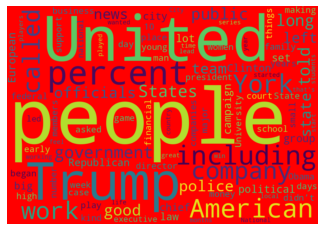

In [0]:
import findspark

from pyspark.sql import SparkSession
from wordcloud  import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter

# creating spark session and sparkcontext

spark = SparkSession.builder.appName("POB Warm-up").getOrCreate()
sc=spark.sparkContext

data_file = sc.textFile("dbfs:/FileStore/shared_uploads/hry5g@umsystem.edu/nytimes_news_articles-1.txt")
each_lines = data_file.filter(lambda x: len(x) > 0)
#remove urls
remove_url = each_lines.filter(lambda x: not x.startswith("URL"))
unique_url = remove_url.flatMap(lambda line: line.split(" ")) \
                            .map(lambda word: (word, 1)) \
                           .reduceByKey(lambda x, y: x + y).map(lambda x: (x[1], x[0])).sortByKey(False)

"""# TASK 1
# Building a word cloud for NY Times articles using Apache Hadoop or Spark.
- List top 100 words used in all articles
- Drop stop words [a, the, in, for, ….]
"""

from wordcloud  import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
word_list = [list(i) for i in unique_url.collect()]
for i in word_list:
    i[1] = i[1].replace(".", "").replace('”', "").replace(',', "").replace("“", "")
# #removing stopwords 
stop_words = ["a", "about", "above", "after", "again", "against", "ain", "all", "am", "an", "and", "any", "are", "aren", "aren't", "as", "at", "be", "because", "been", "before", "being", "—", "it’s", "don’t","i’m", "below", "between", "both", "but", "by", "can", "couldn", "couldn't", "d", "did", "didn", "didn't", "do", "does", "doesn", "doesn't", "doing", "don", "don't", "down", "during", "each", "few", "for", "from", "further", "had", "hadn", "hadn't", "has", "hasn", "hasn't", "have", "haven", "haven't", "having", "he", "her", "here", "hers", "herself", "him", "himself", "his", "how", "i", "if", "in", "into", "is", "isn", "isn't", "it", "it's", "its", "itself", "just", "ll", "m", "ma", "me", "mightn", "mightn't", "more", "most", "mustn", "mustn't", "my", "myself", "needn", "needn't", "no", "nor", "not", "now", "o", "of", "off", "on", "once", "only", "or", "other", "our", "ours", "ourselves", "out", "over", "own", "re", "s", "same", "shan", "shan't", "she", "she's", "should", "should've", "shouldn", "shouldn't", "so", "some", "such", "t", "than", "that", "that'll", "the", "their", "theirs", "them", "themselves", "then", "there", "these", "they", "this", "those", "through", "to", "too", "under", "until", "up", "ve", "very", "was", "wasn", "wasn't", "we", "were", "weren", "weren't", "what", "when", "where", "which", "while", "who", "whom", "why", "will", "with", "won", "won't", "wouldn", "wouldn't", "y", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves", "could", "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i'm", "i've", "let's", "ought", "she'd", "she'll", "that's", "there's", "they'd", "they'll", "they're", "they've", "we'd", "we'll", "we're", "we've", "what's", "when's", "where's", "who's", "why's", "would", "able", "abst", "accordance", "according", "accordingly", "across", "act", "actually", "added", "adj", "affected", "affecting", "affects", "afterwards", "ah", "almost", "alone", "along", "already", "also", "although", "always", "among", "amongst", "announce", "another", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "apparently", "approximately", "arent", "arise", "around", "aside", "ask", "asking", "auth", "available", "away", "awfully", "b", "back", "became", "become", "becomes", "becoming", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "believe", "beside", "besides", "beyond", "biol", "brief", "briefly", "c", "ca", "came", "cannot", "can't", "cause", "causes", "certain", "certainly", "co", "com", "come", "comes", "contain", "containing", "contains", "couldnt", "date", "different", "done", "downwards", "due", "e", "ed", "edu", "effect", "eg", "eight", "eighty", "either", "else", "elsewhere", "end", "ending", "enough", "especially", "et", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "except", "f", "far", "ff", "fifth", "first", "five", "fix", "followed", "following", "follows", "former", "formerly", "forth", "found", "four", "furthermore", "g", "gave", "get", "gets", "getting", "give", "given", "gives", "giving", "go", "goes", "gone", "got", "gotten", "h", "happens", "hardly", "hed", "hence", "hereafter", "hereby", "herein", "heres", "hereupon", "hes", "hi", "hid", "hither", "home", "howbeit", "however", "hundred", "id", "ie", "im", "immediate", "immediately", "importance", "important", "inc", "indeed", "index", "information", "instead", "invention", "inward", "itd", "it'll", "j", "k", "keep", "keeps", "kept", "kg", "km", "know", "known", "knows", "l", "largely", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "lets", "like", "liked", "likely", "line", "little", "'ll", "look", "looking", "looks", "ltd", "made", "mainly", "make", "makes", "many", "may", "maybe", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "million", "miss", "ml", "moreover", "mostly", "mr", "mrs", "much", "mug", "must", "n", "na", "name", "namely", "nay", "nd", "near", "nearly", "necessarily", "necessary", "need", "needs", "neither", "never", "nevertheless", "new", "next", "nine", "ninety", "nobody", "non", "none", "nonetheless", "noone", "normally", "nos", "noted", "nothing", "nowhere", "obtain", "obtained", "obviously", "often", "oh", "ok", "okay", "old", "omitted", "one", "ones", "onto", "ord", "others", "otherwise", "outside", "overall", "owing", "p", "page", "pages", "part", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "poorly", "possible", "possibly", "potentially", "pp", "predominantly", "present", "previously", "primarily", "probably", "promptly", "proud", "provides", "put", "q", "que", "quickly", "quite", "qv", "r", "ran", "rather", "rd", "readily", "really", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "respectively", "resulted", "resulting", "results", "right", "run", "said", "saw", "say", "saying", "says", "sec", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sent", "seven", "several", "shall", "shed", "shes", "show", "showed", "shown", "showns", "shows", "significant", "significantly", "similar", "similarly", "since", "six", "slightly", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically", "specified", "specify", "specifying", "still", "stop", "strongly", "sub", "substantially", "successfully", "sufficiently", "suggest", "sup", "sure", "take", "taken", "taking", "tell", "tends", "th", "thank", "thanks", "thanx", "thats", "that've", "thence", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "thereto", "thereupon", "there've", "theyd", "theyre", "think", "thou", "though", "thoughh", "thousand", "throug", "throughout", "thru", "thus", "til", "tip", "together", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "ts", "twice", "two", "u", "un", "unfortunately", "unless", "unlike", "unlikely", "unto", "upon", "ups", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "v", "value", "various", "'ve", "via", "viz", "vol", "vols", "vs", "w", "want", "wants", "wasnt", "way", "wed", "welcome", "went", "werent", "whatever", "what'll", "whats", "whence", "whenever", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "whim", "whither", "whod", "whoever", "whole", "who'll", "whomever", "whos", "whose", "widely", "willing", "wish", "within", "without", "wont", "words", "world", "wouldnt", "www", "x", "yes", "yet", "youd", "youre", "z", "zero", "a's", "ain't", "allow", "allows", "apart", "appear", "appreciate", "appropriate", "associated", "best", "better", "c'mon", "c's", "cant", "changes", "clearly", "concerning", "consequently", "consider", "considering", "corresponding", "course", "currently", "definitely", "described", "despite", "entirely", "exactly", "example", "going", "greetings", "hello", "help", "hopefully", "ignored", "inasmuch", "indicate", "indicated", "indicates", "inner", "insofar", "it'd", "keep", "keeps", "novel", "presumably", "reasonably", "second", "secondly", "sensible", "serious", "seriously", "sure", "t's", "third", "thorough", "thoroughly", "three", "well", "wonder", "a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "another", "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "around", "as", "at", "back", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "co", "op", "research-articl", "pagecount", "cit", "ibid", "les", "le", "au", "que", "est", "pas", "vol", "el", "los", "pp", "u201d", "well-b", "http", "volumtype", "par", "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a1", "a2", "a3", "a4", "ab", "ac", "ad", "ae", "af", "ag", "aj", "al", "an", "ao", "ap", "ar", "av", "aw", "ax", "ay", "az", "b1", "b2", "b3", "ba", "bc", "bd", "be", "bi", "bj", "bk", "bl", "bn", "bp", "br", "bs", "bt", "bu", "bx", "c1", "c2", "c3", "cc", "cd", "ce", "cf", "cg", "ch", "ci", "cj", "cl", "cm", "cn", "cp", "cq", "cr", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d2", "da", "dc", "dd", "de", "df", "di", "dj", "dk", "dl", "do", "dp", "dr", "ds", "dt", "du", "dx", "dy", "e2", "e3", "ea", "ec", "ed", "ee", "ef", "ei", "ej", "el", "em", "en", "eo", "ep", "eq", "er", "es", "et", "eu", "ev", "ex", "ey", "f2", "fa", "fc", "ff", "fi", "fj", "fl", "fn", "fo", "fr", "fs", "ft", "fu", "fy", "ga", "ge", "gi", "gj", "gl", "go", "gr", "gs", "gy", "h2", "h3", "hh", "hi", "hj", "ho", "hr", "hs", "hu", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ic", "ie", "ig", "ih", "ii", "ij", "il", "in", "io", "ip", "iq", "ir", "iv", "ix", "iy", "iz", "jj", "jr", "js", "jt", "ju", "ke", "kg", "kj", "km", "ko", "l2", "la", "lb", "lc", "lf", "lj", "ln", "lo", "lr", "ls", "lt", "m2", "ml", "mn", "mo", "ms", "mt", "mu", "n2", "nc", "nd", "ne", "ng", "ni", "nj", "nl", "nn", "nr", "ns", "nt", "ny", "oa", "ob", "oc", "od", "of", "og", "oi", "oj", "ol", "om", "on", "oo", "oq", "or", "os", "ot", "ou", "ow", "ox", "oz", "p1", "p2", "p3", "pc", "pd", "pe", "pf", "ph", "pi", "pj", "pk", "pl", "pm", "pn", "po", "pq", "pr", "ps", "pt", "pu", "py", "qj", "qu", "r2", "ra", "rc", "rd", "rf", "rh", "ri", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "rv", "ry", "s2", "sa", "sc", "sd", "se", "sf", "si", "sj", "sl", "sm", "sn", "sp", "sq", "sr", "ss", "st", "sy", "sz", "t1", "t2", "t3", "tb", "tc", "td", "te", "tf", "th", "ti", "tj", "tl", "tm", "tn", "tp", "tq", "tr", "ts", "tt", "tv", "tx", "ue", "ui", "uj", "uk", "um", "un", "uo", "ur", "ut", "va", "wa", "vd", "wi", "vj", "vo", "wo", "vq", "vt", "vu", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y2", "yj", "yl", "yr", "ys", "yt", "zi", "zz"]
exclude_words=[t for t in word_list if t[1].lower() not in stop_words]
#top 100 in dictionary
word_dictionary={exclude_words[i][1]:exclude_words[i][0] for i in range(len(exclude_words)) if i<100}
#plotting in wordcloud
wordcloud = WordCloud(width = 1000, height = 700, background_color ='red')
wordcloud.generate_from_frequencies(frequencies=word_dictionary)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

['sports', 'world', 'us', 'business', 'nyregion']

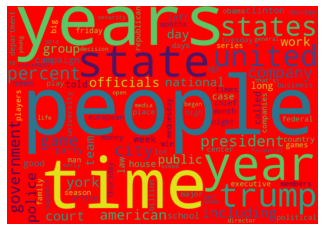

In [0]:
"""# TASK 2
# Also, the word cloud for top 5 news category 
  - Category that has the most of news articles
  - URL contains the category which the news belong
"""

top_5_news = {}
for i in data_file.collect():
    if i.startswith("URL"):
        category = i.split('/')[6]
        if category in top_5_news:
            top_5_news[category] += 1
        else:
            top_5_news[category] = 1

        from collections import Counter
top_5_list = list(dict(Counter(top_5_news).most_common(5)).keys())
top_5_list

current_url = ""
url = {}
for i in each_lines.collect():
    if i.startswith("URL") :
        current_url = i
    else:
        if current_url in url:
            url[current_url] += i
        else:
            url[current_url] = i

url

top_5_info = ""
for article in url:
    if any(top in article for top in top_5_list):
        top_5_info += url[article]
top_5_words =top_5_info.split(" ")
top_5_words = [(i.lower()).replace(".", "").replace('”', "").replace(',', "").replace("“", "") for i in top_5_words]
top_5_words_exclude_stop = [i for i in top_5_words if i not in stop_words]
top_5_categort_freq = {}
for i in top_5_words_exclude_stop:
    
    if i not in top_5_categort_freq:
        top_5_categort_freq[i] = 1
    else:
        top_5_categort_freq[i] += 1
top_5_category_top_100 = dict(Counter(top_5_categort_freq).most_common(100))
top_5_category_top_100

print(top_5_list)

#plotting in wordcloud for top5 category words
wordcloud.generate_from_frequencies(frequencies=top_5_category_top_100)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:

"""# TASK 3
# List the top 10 words that are shared among the highest number of news articles in the same category
"""
#The unique categories
all_Urls = {}
for i in data_file.collect():
    if i.startswith("URL"):
        category = i.split('/')[6]
        if category in all_Urls:
            all_Urls[category] += 1
        else:
            all_Urls[category] = 1

        from collections import Counter
unique_category_list = list(dict(Counter(all_Urls).most_common(100)).keys())
unique_category_list

print('Categories present in data set')
print(unique_category_list)

category_list = {}
for each_category in unique_category_list:
    for eachurl in url:
        if each_category in eachurl:
            if each_category in category_list:   
                category_list[each_category] += url[eachurl]
            else:
                category_list[each_category] = url[eachurl]

category_list

#top 10 common words
count = 1
for each in unique_category_list:
  top_10_common_list = {}
  top_10_sports = category_list[each]
  common_words = top_10_sports.split(" ")
  common_words_replace = [(i.lower()).replace(".", "").replace('”', "").replace(',', "").replace("“", "") for i in common_words]
  common_words_exclude_stop = [i for i in common_words_replace if i not in stop_words]
  top_10_common_list.update(Counter(common_words_exclude_stop).most_common(10))
  print('Category '+str(count)+': '+each)
  print(top_10_common_list)
  count +=1
  
  for each_word in top_10_common_list:
    print(each_word+' appeared in '+str(top_10_common_list[each_word])+' articles under category '+each)  


Categories present in data set
['sports', 'world', 'us', 'business', 'nyregion', 'arts', 'fashion', 'technology', 'dining', 't-magazine', 'realestate', 'science', 'magazine', 'theater', 'travel', 'upshot', 'movies', 'insider', 'books', 'health', 'nytnow', 'pageoneplus', 'your-money', 'style', 'education', 'jobs', 'automobiles', 'universal']

Category 1: sports
{'game': 3589, 'team': 2426, 'season': 2002, 'players': 1869, 'games': 1864, 'time': 1820, 'play': 1473, 'league': 1397, 'years': 1342, 'year': 1320}
game appeared in 3589 articles under category sports
team appeared in 2426 articles under category sports
season appeared in 2002 articles under category sports
players appeared in 1869 articles under category sports
games appeared in 1864 articles under category sports
time appeared in 1820 articles under category sports
play appeared in 1473 articles under category sports
league appeared in 1397 articles under category sports
years appeared in 1342 articles under category sports
year appeared in 1320 articles under category sports

Category 2: world
{'government': 2279, 'people': 2246, 'united': 2012, 'states': 1414, 'european': 1404, 'years': 1352, 'state': 1338, 'party': 1298, 'officials': 1287, 'president': 1280}
government appeared in 2279 articles under category world
people appeared in 2246 articles under category world
united appeared in 2012 articles under category world
states appeared in 1414 articles under category world
european appeared in 1404 articles under category world
years appeared in 1352 articles under category world
state appeared in 1338 articles under category world
party appeared in 1298 articles under category world
officials appeared in 1287 articles under category world
president appeared in 1280 articles under category world

Category 3: us
{'trump': 4933, 'people': 4759, 'percent': 3901, 'year': 3494, 'years': 3418, 'states': 3278, 'time': 3215, 'company': 3191, 'united': 3048, 'state': 3044}
trump appeared in 4933 articles under category us
people appeared in 4759 articles under category us
percent appeared in 3901 articles under category us
year appeared in 3494 articles under category us
years appeared in 3418 articles under category us
states appeared in 3278 articles under category us
time appeared in 3215 articles under category us
company appeared in 3191 articles under category us
united appeared in 3048 articles under category us
state appeared in 3044 articles under category us

Category 4: business
{'percent': 2670, 'company': 2460, 'year': 1548, 'companies': 1355, 'billion': 1326, 'years': 1147, 'people': 1114, 'business': 1111, 'chief': 1031, 'financial': 992}
percent appeared in 2670 articles under category business
company appeared in 2460 articles under category business
year appeared in 1548 articles under category business
companies appeared in 1355 articles under category business
billion appeared in 1326 articles under category business
years appeared in 1147 articles under category business
people appeared in 1114 articles under category business
business appeared in 1111 articles under category business
chief appeared in 1031 articles under category business
financial appeared in 992 articles under category business

Category 5: nyregion
{'york': 1326, 'city': 1308, 'police': 954, 'years': 951, 'people': 930, 'state': 922, 'year': 724, 'time': 709, 'school': 605, 'department': 540}
york appeared in 1326 articles under category nyregion
city appeared in 1308 articles under category nyregion
police appeared in 954 articles under category nyregion
years appeared in 951 articles under category nyregion
people appeared in 930 articles under category nyregion
state appeared in 922 articles under category nyregion
year appeared in 724 articles under category nyregion
time appeared in 709 articles under category nyregion
school appeared in 605 articles under category nyregion
department appeared in 540 articles under category nyregion

Category 6: arts
{'art': 1110, 'music': 861, 'work': 778, 'people': 726, 'time': 683, 'york': 641, 'years': 632, 'museum': 602, 'season': 519, 'year': 516}
art appeared in 1110 articles under category arts
music appeared in 861 articles under category arts
work appeared in 778 articles under category arts
people appeared in 726 articles under category arts
time appeared in 683 articles under category arts
york appeared in 641 articles under category arts
years appeared in 632 articles under category arts
museum appeared in 602 articles under category arts
season appeared in 519 articles under category arts
year appeared in 516 articles under category arts

Category 7: fashion
{'york': 690, 'fashion': 623, 'graduated': 540, 'father': 505, 'time': 481, 'people': 477, 'mother': 473, 'couple': 446, 'university': 428, 'met': 409}
york appeared in 690 articles under category fashion
fashion appeared in 623 articles under category fashion
graduated appeared in 540 articles under category fashion
father appeared in 505 articles under category fashion
time appeared in 481 articles under category fashion
people appeared in 477 articles under category fashion
mother appeared in 473 articles under category fashion
couple appeared in 446 articles under category fashion
university appeared in 428 articles under category fashion
met appeared in 409 articles under category fashion

Category 8: technology
{'company': 603, 'people': 507, 'companies': 489, 'facebook': 465, 'google': 439, 'apple': 424, 'technology': 345, 'tech': 343, 'app': 325, 'year': 277}
company appeared in 603 articles under category technology
people appeared in 507 articles under category technology
companies appeared in 489 articles under category technology
facebook appeared in 465 articles under category technology
google appeared in 439 articles under category technology
apple appeared in 424 articles under category technology
technology appeared in 345 articles under category technology
tech appeared in 343 articles under category technology
app appeared in 325 articles under category technology
year appeared in 277 articles under category technology

Category 9: dining
{'recipe': 332, 'food': 274, 'cooking': 255, 'restaurant': 247, 'chef': 196, 'wine': 194, 'chicken': 160, 'recipes': 153, 'cook': 152, 'good': 142}
recipe appeared in 332 articles under category dining
food appeared in 274 articles under category dining
cooking appeared in 255 articles under category dining
restaurant appeared in 247 articles under category dining
chef appeared in 196 articles under category dining
wine appeared in 194 articles under category dining
chicken appeared in 160 articles under category dining
recipes appeared in 153 articles under category dining
cook appeared in 152 articles under category dining
good appeared in 142 articles under category dining

Category 10: t-magazine
{'work': 175, 'art': 171, 'time': 160, 'people': 158, 'years': 131, 'space': 107, 'collection': 103, 'city': 103, 'artist': 102, 'place': 96}
work appeared in 175 articles under category t-magazine
art appeared in 171 articles under category t-magazine
time appeared in 160 articles under category t-magazine
people appeared in 158 articles under category t-magazine
years appeared in 131 articles under category t-magazine
space appeared in 107 articles under category t-magazine
collection appeared in 103 articles under category t-magazine
city appeared in 103 articles under category t-magazine
artist appeared in 102 articles under category t-magazine
place appeared in 96 articles under category t-magazine

Category 11: realestate
{'house': 449, 'building': 351, 'room': 345, 'city': 337, 'square': 314, 'apartment': 308, 'street': 265, 'percent': 248, 'real': 238, 'years': 235}
house appeared in 449 articles under category realestate
building appeared in 351 articles under category realestate
room appeared in 345 articles under category realestate
city appeared in 337 articles under category realestate
square appeared in 314 articles under category realestate
apartment appeared in 308 articles under category realestate
street appeared in 265 articles under category realestate
percent appeared in 248 articles under category realestate
real appeared in 238 articles under category realestate
years appeared in 235 articles under category realestate

Category 12: science
{'years': 259, 'scientists': 227, 'people': 222, 'climate': 205, 'university': 201, 'time': 186, 'study': 163, 'species': 150, 'researchers': 148, 'called': 147}
years appeared in 259 articles under category science
scientists appeared in 227 articles under category science
people appeared in 222 articles under category science
climate appeared in 205 articles under category science
university appeared in 201 articles under category science
time appeared in 186 articles under category science
study appeared in 163 articles under category science
species appeared in 150 articles under category science
researchers appeared in 148 articles under category science
called appeared in 147 articles under category science

Category 13: magazine
{'people': 722, 'time': 561, 'years': 475, 'work': 438, 'told': 432, 'trump': 367, 'white': 340, 'black': 322, 'city': 280, 'cancer': 280}
people appeared in 722 articles under category magazine
time appeared in 561 articles under category magazine
years appeared in 475 articles under category magazine
work appeared in 438 articles under category magazine
told appeared in 432 articles under category magazine
trump appeared in 367 articles under category magazine
white appeared in 340 articles under category magazine
black appeared in 322 articles under category magazine
city appeared in 280 articles under category magazine
cancer appeared in 280 articles under category magazine

Category 14: theater
{'theater': 472, 'broadway': 437, 'musical': 319, 'play': 299, 'hamilton': 208, 'production': 193, 'tony': 186, 'season': 151, 'york': 150, 'people': 141}
theater appeared in 472 articles under category theater
broadway appeared in 437 articles under category theater
musical appeared in 319 articles under category theater
play appeared in 299 articles under category theater
hamilton appeared in 208 articles under category theater
production appeared in 193 articles under category theater
tony appeared in 186 articles under category theater
season appeared in 151 articles under category theater
york appeared in 150 articles under category theater
people appeared in 141 articles under category theater

Category 15: travel
{'hotel': 287, 'city': 273, 'people': 269, 'time': 245, 'travel': 225, 'place': 190, 'day': 174, 'including': 172, 'restaurant': 162, 'years': 159}
hotel appeared in 287 articles under category travel
city appeared in 273 articles under category travel
people appeared in 269 articles under category travel
time appeared in 245 articles under category travel
travel appeared in 225 articles under category travel
place appeared in 190 articles under category travel
day appeared in 174 articles under category travel
including appeared in 172 articles under category travel
restaurant appeared in 162 articles under category travel
years appeared in 159 articles under category travel

Category 16: upshot
{'percent': 507, 'trump': 417, 'voters': 373, 'people': 355, 'clinton': 269, 'states': 254, 'polls': 243, 'vote': 216, 'year': 194, 'economy': 187}
percent appeared in 507 articles under category upshot
trump appeared in 417 articles under category upshot
voters appeared in 373 articles under category upshot
people appeared in 355 articles under category upshot
clinton appeared in 269 articles under category upshot
states appeared in 254 articles under category upshot
polls appeared in 243 articles under category upshot
vote appeared in 216 articles under category upshot
year appeared in 194 articles under category upshot
economy appeared in 187 articles under category upshot

Category 17: movies
{'film': 531, 'movie': 326, 'films': 212, 'movies': 183, 'people': 167, 'time': 153, 'director': 131, 'work': 127, 'story': 119, 'hollywood': 114}
film appeared in 531 articles under category movies
movie appeared in 326 articles under category movies
films appeared in 212 articles under category movies
movies appeared in 183 articles under category movies
people appeared in 167 articles under category movies
time appeared in 153 articles under category movies
director appeared in 131 articles under category movies
work appeared in 127 articles under category movies
story appeared in 119 articles under category movies
hollywood appeared in 114 articles under category movies

Category 18: insider
{'times': 394, 'york': 224, 'insider': 158, 'news': 138, 'time': 124, 'years': 124, 'people': 123, 'story': 121, 'editor': 77, 'reporter': 77}
times appeared in 394 articles under category insider
york appeared in 224 articles under category insider
insider appeared in 158 articles under category insider
news appeared in 138 articles under category insider
time appeared in 124 articles under category insider
years appeared in 124 articles under category insider
people appeared in 123 articles under category insider
story appeared in 121 articles under category insider
editor appeared in 77 articles under category insider
reporter appeared in 77 articles under category insider

Category 19: books
{'book': 328, 'books': 217, 'people': 149, 'time': 112, 'life': 108, 'read': 108, 'times': 98, 'years': 92, 'story': 87, 'work': 81}
book appeared in 328 articles under category books
books appeared in 217 articles under category books
people appeared in 149 articles under category books
time appeared in 112 articles under category books
life appeared in 108 articles under category books
read appeared in 108 articles under category books
times appeared in 98 articles under category books
years appeared in 92 articles under category books
story appeared in 87 articles under category books
work appeared in 81 articles under category books

Category 20: health
{'health': 482, 'people': 299, 'care': 238, 'percent': 205, 'years': 159, 'patients': 150, 'women': 146, 'medical': 142, 'states': 139, 'zika': 139}
health appeared in 482 articles under category health
people appeared in 299 articles under category health
care appeared in 238 articles under category health
percent appeared in 205 articles under category health
years appeared in 159 articles under category health
patients appeared in 150 articles under category health
women appeared in 146 articles under category health
medical appeared in 142 articles under category health
states appeared in 139 articles under category health
zika appeared in 139 articles under category health

Category 21: nytnow
{'briefing': 229, '6': 180, 'here’s': 166, 'posted': 157, 'trump': 151, 'people': 127, 'evening': 120, 'president': 94, 'clinton': 84, 'eastern': 83}
briefing appeared in 229 articles under category nytnow
6 appeared in 180 articles under category nytnow
here’s appeared in 166 articles under category nytnow
posted appeared in 157 articles under category nytnow
trump appeared in 151 articles under category nytnow
people appeared in 127 articles under category nytnow
evening appeared in 120 articles under category nytnow
president appeared in 94 articles under category nytnow
clinton appeared in 84 articles under category nytnow
eastern appeared in 83 articles under category nytnow

Category 22: pageoneplus
{'article': 544, 'misstated': 292, 'comments': 144, 'incorrectly': 142, 'e-mailed': 140, '(212)': 140, 'error': 135, 'referred': 121, 'misidentified': 116, 'editions': 112}
article appeared in 544 articles under category pageoneplus
misstated appeared in 292 articles under category pageoneplus
comments appeared in 144 articles under category pageoneplus
incorrectly appeared in 142 articles under category pageoneplus
e-mailed appeared in 140 articles under category pageoneplus
(212) appeared in 140 articles under category pageoneplus
error appeared in 135 articles under category pageoneplus
referred appeared in 121 articles under category pageoneplus
misidentified appeared in 116 articles under category pageoneplus
editions appeared in 112 articles under category pageoneplus

Category 23: your-money
{'people': 172, 'financial': 163, 'money': 162, 'percent': 137, 'years': 117, 'year': 100, 'time': 100, 'work': 97, 'pay': 89, 'company': 84}
people appeared in 172 articles under category your-money
financial appeared in 163 articles under category your-money
money appeared in 162 articles under category your-money
percent appeared in 137 articles under category your-money
years appeared in 117 articles under category your-money
year appeared in 100 articles under category your-money
time appeared in 100 articles under category your-money
work appeared in 97 articles under category your-money
pay appeared in 89 articles under category your-money
company appeared in 84 articles under category your-money

Category 24: style
{'design': 127, 'people': 95, 'years': 89, 'fashion': 88, 'time': 78, 'men’s': 73, 'designer': 71, 'wear': 66, 'york': 66, 'collection': 63}
design appeared in 127 articles under category style
people appeared in 95 articles under category style
years appeared in 89 articles under category style
fashion appeared in 88 articles under category style
time appeared in 78 articles under category style
men’s appeared in 73 articles under category style
designer appeared in 71 articles under category style
wear appeared in 66 articles under category style
york appeared in 66 articles under category style
collection appeared in 63 articles under category style

Category 25: education
{'students': 337, 'education': 144, 'college': 144, 'university': 105, 'school': 80, 'colleges': 77, 'percent': 72, 'student': 70, 'schools': 65, 'people': 59}
students appeared in 337 articles under category education
education appeared in 144 articles under category education
college appeared in 144 articles under category education
university appeared in 105 articles under category education
school appeared in 80 articles under category education
colleges appeared in 77 articles under category education
percent appeared in 72 articles under category education
student appeared in 70 articles under category education
schools appeared in 65 articles under category education
people appeared in 59 articles under category education

Category 26: jobs
{'jobs': 92, 'work': 80, 'job': 67, 'workers': 67, 'people': 64, 'government': 49, 'time': 46, 'economy': 46, 'percent': 46, 'data': 44}
jobs appeared in 92 articles under category jobs
work appeared in 80 articles under category jobs
job appeared in 67 articles under category jobs
workers appeared in 67 articles under category jobs
people appeared in 64 articles under category jobs
government appeared in 49 articles under category jobs
time appeared in 46 articles under category jobs
economy appeared in 46 articles under category jobs
percent appeared in 46 articles under category jobs
data appeared in 44 articles under category jobs
Category 27: automobiles
{'vehicles': 37, 'car': 36, 'prices': 26, 'people': 24, 'cars': 24, 'years': 22, 'small': 21, 'model': 21, 'technology': 21, 'mitsubishi': 21}
vehicles appeared in 37 articles under category automobiles
car appeared in 36 articles under category automobiles
prices appeared in 26 articles under category automobiles
people appeared in 24 articles under category automobiles
cars appeared in 24 articles under category automobiles
years appeared in 22 articles under category automobiles
small appeared in 21 articles under category automobiles
model appeared in 21 articles under category automobiles
technology appeared in 21 articles under category automobiles
mitsubishi appeared in 21 articles under category automobiles

Category 28: universal
{'수': 80, '있는': 64, '더': 60, '있다': 43, '다른': 42, '그': 36, '한': 31, '이': 29, '많은': 27, '가장': 26}
수 appeared in 80 articles under category universal
있는 appeared in 64 articles under category universal
더 appeared in 60 articles under category universal
있다 appeared in 43 articles under category universal
다른 appeared in 42 articles under category universal
그 appeared in 36 articles under category universal
한 appeared in 31 articles under category universal
이 appeared in 29 articles under category universal
많은 appeared in 27 articles under category universal
가장 appeared in 26 articles under category universal